<center><h3>VELLORE INSTITUTE OF TECHNOLOGY</h3></center>
<center><b>CSE4020	Machine Learning<b></center>
<center><b>Lab Assessment - 6<b></center>

<h1>17BCE0581</h1>
<h3>SATYAM SINGH CHAUHAN</h3>

<h1>Random Forest Ensemble Learning</h1>
<h2>Importing required Libraries</h2>

In [152]:
# Import pandas library
import pandas as pd

<h2>Loading Data - Diabetes Dataset</h2>

In [203]:
# Initializing the feature/column names
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# load dataset
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)

<h2>Exploring Data</h2>

In [154]:
# First 5 rows of the dataset
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<h2>Selecting Features</h2>

In [208]:
# Split dataset in features and target variable
feature_cols = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']

# Features
X = pima[feature_cols]

# Target variable
y = pima.label

In [156]:
# Exploring Values of the Dataset
print(X[0:5])

   pregnant  glucose  bp  skin  insulin   bmi  pedigree  age
0         6      148  72    35        0  33.6     0.627   50
1         1       85  66    29        0  26.6     0.351   31
2         8      183  64     0        0  23.3     0.672   32
3         1       89  66    23       94  28.1     0.167   21
4         0      137  40    35      168  43.1     2.288   33


In [157]:
# Labels of Dataset
print(y[0:5])

0    1
1    0
2    1
3    0
4    1
Name: label, dtype: int64


<h2>Splitting Data</h2>

In [209]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
# 70% training and 30% test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=9)

<h2>Train the Model</h2>

In [210]:
# Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Create a Gaussian Classifier
# Parameter - n_estimators is optional integer value which signifies the number of trees in the forest.
clf=RandomForestClassifier(n_estimators=100)

# Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

<h2>Checking the Accuracy</h2>

In [181]:
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7272727272727273


<h2>Predicting</h2>

In [211]:
# Entering the values in this given format ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']
clf.predict([[8, 185, 75, 30, 30, 31.2, 0.623, 47]])

array([1], dtype=int64)

1 Indicates Diabetes

In [183]:
clf.predict([[0, 120, 75, 0, 30, 23.2, 0.623, 47]])

array([0], dtype=int64)

0 indicates not having Diabetes

<h2>Finding Important Features in Scikit-learn</h2>

<center>
    <h2>Random Forest Classifier</h2>
</center>
<p>A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).
</p>
<div style="text-align: right">Source: <a href = "https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html">https://scikit-learn.org </a> </div>

In [184]:
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest Model
clf=RandomForestClassifier(n_estimators=100)

# Train the model using the training sets y_pred = clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [185]:
# feature importance variable to see feature importance scores.
feature_imp = pd.Series(clf.feature_importances_,index=feature_cols).sort_values(ascending=False)
print(feature_imp)

glucose     0.275926
bmi         0.161358
age         0.138840
pedigree    0.119199
bp          0.088062
pregnant    0.080998
skin        0.069308
insulin     0.066309
dtype: float64


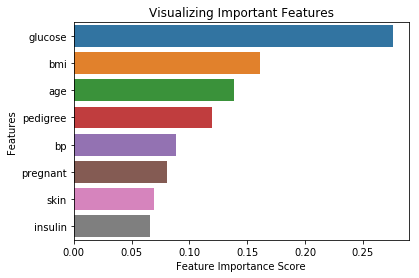

In [186]:
# Importing Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

<h2>Generating the Model on Selected Features</h2>

In [201]:
# Split dataset into features and labels
feature_cols = ['glucose', 'bmi', 'age', 'pedigree', 'bp', 'pregnant']
X = pima[feature_cols] # Features
y = pima.label # Target variable

# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=9)

In [202]:
from sklearn.ensemble import RandomForestClassifier

# Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

# Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# Prediction on test set
y_pred=clf.predict(X_test)

# Import scikit-learn metrics module for accuracy calculation
# from sklearn import metrics

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7597402597402597


<u><center><h2>Conclusion</h2></center></u>
<br>
We can observe that after removing the least important features like <b><i>'skin'</i></b> & <b><i>'insulin'</i></b> , the accuracy increased.
When all the features were considered Accuracy was 72% and Accuracy got increased to 75.9% when most important features were selected.
<br>
<br>
This may happen due to many reason like removing misleading data and noise, which results in increased accuracy. Another advantage is it reduces the training time.